# Business Understanding

We would like to monitor the Corona Virus's global spread using local data that is specific to each individual.
The overall information doesn't really apply to me. I'd like to learn more about the spread's local growth in depth.

## objectives

1. we  would like to understand the data quality 
2. everything should be automated

# Data Understanding

Here i want to gather information from the website ourworld in data by using the URL

In [115]:
import pandas as pd
pd.set_option('display.max_rows',500)

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv" ## we are going to collect data from this URL

In [117]:
df_basic=pd.read_csv(url)

In [118]:
df_basic

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197460,ZWE,Africa,Zimbabwe,2022-06-24,255309.0,173.0,79.429,5549.0,7.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197461,ZWE,Africa,Zimbabwe,2022-06-25,255309.0,0.0,79.429,5549.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197462,ZWE,Africa,Zimbabwe,2022-06-26,255355.0,46.0,79.143,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197463,ZWE,Africa,Zimbabwe,2022-06-27,255383.0,28.0,78.857,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [119]:
df_basic.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [120]:
df_basic['location']

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
197460       Zimbabwe
197461       Zimbabwe
197462       Zimbabwe
197463       Zimbabwe
197464       Zimbabwe
Name: location, Length: 197465, dtype: object

In [121]:
df_basic['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [122]:
a_G=df_basic['location']=='Germany'
a_U=df_basic['location']=='Italy'
a_I=df_basic['location']=='Brazil'

In [123]:
a_W=a_G|a_U|a_I

In [124]:
df_intermediate=df_basic[a_W]

In [125]:
df_intermediate=df_intermediate.reset_index(drop=True)

In [126]:
df_intermediate

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
3,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,7049.6,3.31,5.25,32.943066
4,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,ITA,Europe,Italy,2022-06-24,18128044.0,56410.0,45444.286,168018.0,51.0,51.429,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
2614,ITA,Europe,Italy,2022-06-25,18184917.0,56873.0,48573.143,168058.0,40.0,50.714,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
2615,ITA,Europe,Italy,2022-06-26,18234242.0,49325.0,50726.000,168102.0,44.0,54.429,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
2616,ITA,Europe,Italy,2022-06-27,18259261.0,25019.0,51885.143,168165.0,63.0,55.000,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN


In [127]:
import missingno as msno

<AxesSubplot:>

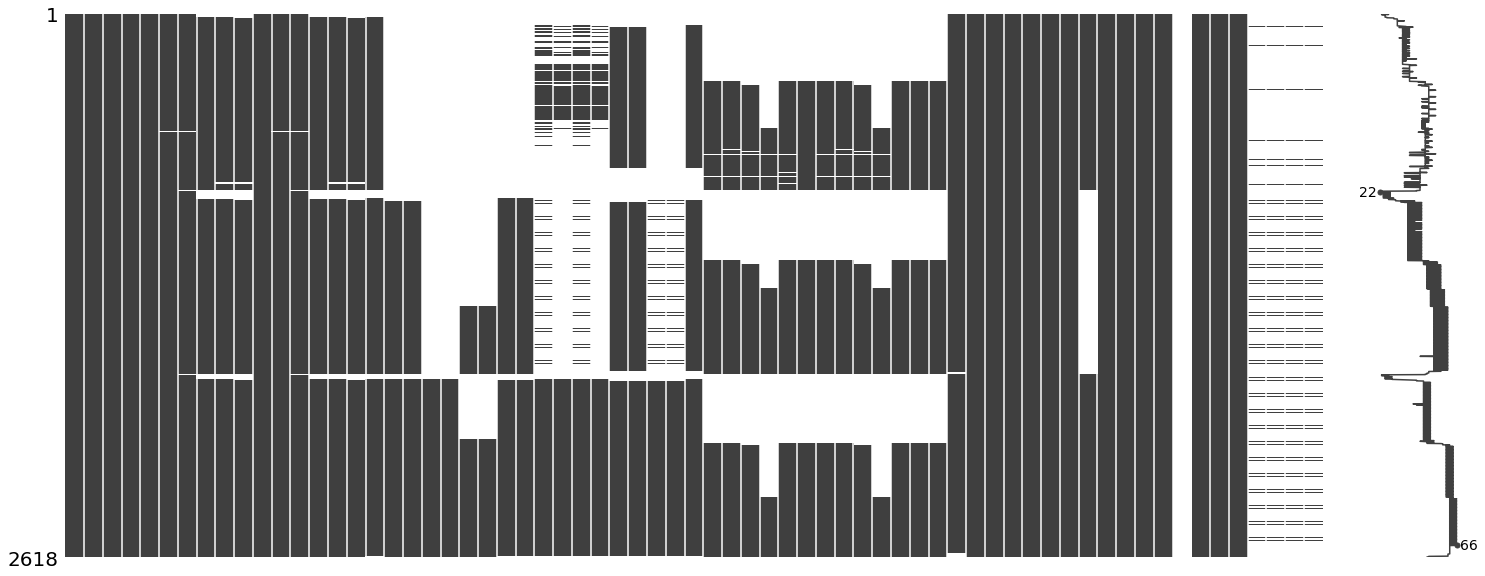

In [128]:
msno.matrix(df_intermediate) ## ploating the graph

In [129]:
df_intermediate.columns ## The graph is too big to understand so we have to reduce the columns .so we have to sort the columns. 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:>

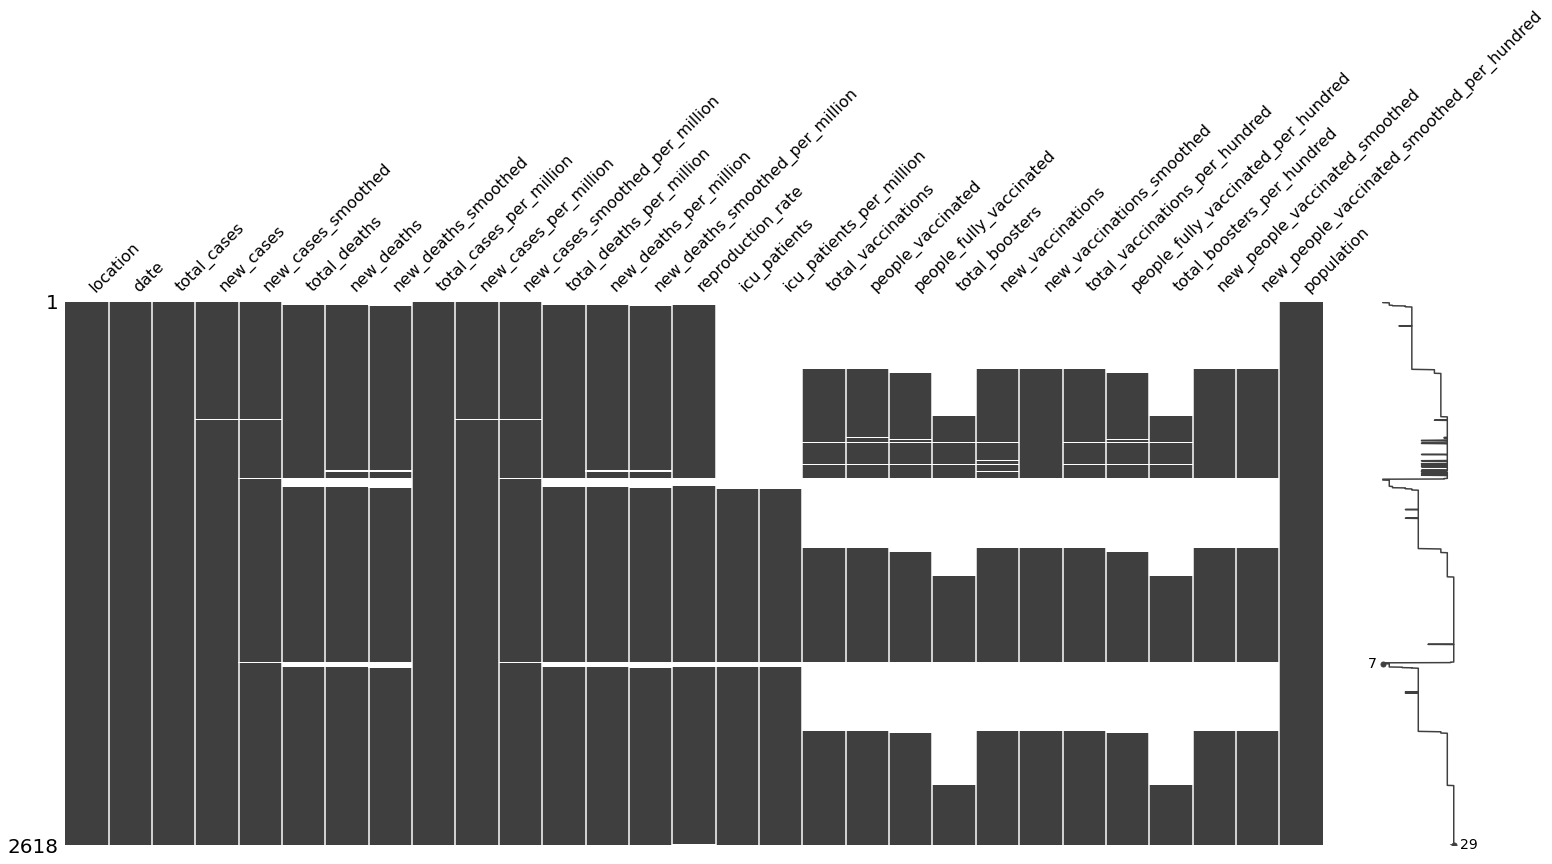

In [130]:
msno.matrix(df_intermediate[['location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred',
       'population'
]]) ## select some columns and plot the graph.

# Plotting the data
we are going to plot the graph using plotly library

In [131]:
# from plotly website directly, replace with code from class
import plotly.express as px

fig = px.line(df_intermediate, x="date", y="total_cases", color='location', title='Total covid Cases')
fig.show()

In [132]:
df_intermediate['total_cases_norm']=df_intermediate['total_cases']/df_intermediate['population']

In [133]:
fig = px.line(df_intermediate, x="date", y="total_cases_norm", color='location', title='Total covid Cases')
fig.show()

In [134]:
fig = px.line(df_intermediate, x="date", y="people_vaccinated", color='location', title='People Vaccinations')
fig.show()

In [135]:
df_intermediate['people_vaccinated_norm']=df_intermediate['people_vaccinated']/df_intermediate['population']

In [136]:
fig = px.line(df_intermediate, x="date", y="people_vaccinated_norm", color='location', title='People Vaccinations Norm')
fig.show()